In [25]:
# Import libraries and init Matplotlib for inline graphs
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import myvariant as mv
import numpy as np
import pyupset as pup

In [26]:
data = pd.read_excel("../data/Graeme Ford - Supplementary Table.xlsx", sheet_name=0)
data2 = pd.read_excel("../data/Graeme Ford - Supplementary Table.xlsx", sheet_name=1)
data3 = pd.read_excel("../data/Graeme Ford - Supplementary Table.xlsx", sheet_name=2)

data["start_coord"] = data["Location"].str.split(":").str[1].str.split("-").str[0]
data.sort_values(["start_coord"]).reset_index(inplace=True)

data2["start_coord"] = data["Location"].str.split(":").str[1].str.split("-").str[0]
data2.sort_values(["start_coord"]).reset_index(inplace=True)

data3["start_coord"] = data["Location"].str.split(":").str[1].str.split("-").str[0]
data3.sort_values(["start_coord"]).reset_index(inplace=True)

data
data2
data3

,Variant,Location,Allele,Existing_variation,Consequence,Feature,SOURCE,SIFT,PolyPhen,Condel,...,SAS,AFR_P_EUR,AFR_OR_EUR,AFR_P_EAS,AFR_OR_EAS,AFR_P_AMR,AFR_OR_AMR,AFR_P_SAS,AFR_OR_SAS,start_coord
0,rs542251636,4:69051284-69051284,A,rs542251636,5_prime_UTR_variant,NM_001349568,RefSeq,-,-,-,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,4.077556e-01,0.000000,1.000000e+00,0.000000,40843438
1,rs139596411,4:69051286-69051286,A,rs139596411,5_prime_UTR_variant,NM_001349568,RefSeq,-,-,-,...,0.000000,1.734365e-06,NaN,1.734200e-06,NaN,1.690555e-03,6.997344,1.808678e-06,NaN,40843446
2,rs115674975,4:69051298-69051298,T,rs115674975,5_prime_UTR_variant,NM_001349568,RefSeq,-,-,-,...,0.145200,1.489598e-41,0.083463,1.756379e-06,NaN,4.024650e-11,0.203246,5.314220e-27,0.117391,40843552
3,rs528415423,4:69051301-69051301,A,rs528415423,5_prime_UTR_variant,NM_001349568,RefSeq,-,-,-,...,0.007157,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,6.946539e-03,0.000000,40843567
4,rs4422474,4:69051322-69051322,G,-,5_prime_UTR_variant,NM_001349568,RefSeq,-,-,-,...,0.570600,1.368217e-50,0.253451,1.902089e-08,0.588334,7.675789e-40,0.262272,1.020424e-41,0.286651,40843603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,rs180691869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,NaN
2334,rs552681766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,NaN
2335,rs554609835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,NaN
2336,rs560040049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,NaN


In [27]:
clin_filter = ((data["AFR"] >= 0.04) | (data["AMR"] >= 0.04) | (data["SAS"] >= 0.04) | (data["EAS"] >= 0.04) | (data["EUR"] >= 0.04))& ~(data["Allele"].str.contains("-", na=False)) & ~(data["A1"].str.contains("CN", na=False)) 
data = data.loc[clin_filter]

clin_filter2 = ((data2["AFR"] >= 0.04) | (data2["AMR"] >= 0.04) | (data2["SAS"] >= 0.04) | (data2["EAS"] >= 0.04) | (data2["EUR"] >= 0.04))& ~(data2["Allele"].str.contains("-", na=False)) & ~(data2["A1"].str.contains("CN", na=False)) 
data2 = data2.loc[clin_filter2]

clin_filter3 = ((data3["AFR"] >= 0.04) | (data3["AMR"] >= 0.04) | (data3["SAS"] >= 0.04) | (data3["EAS"] >= 0.04) | (data3["EUR"] >= 0.04))& ~(data3["Allele"].str.contains("-", na=False)) & ~(data3["A1"].str.contains("CN", na=False)) 
data3 = data3.loc[clin_filter3]

# Now lets make some graphs

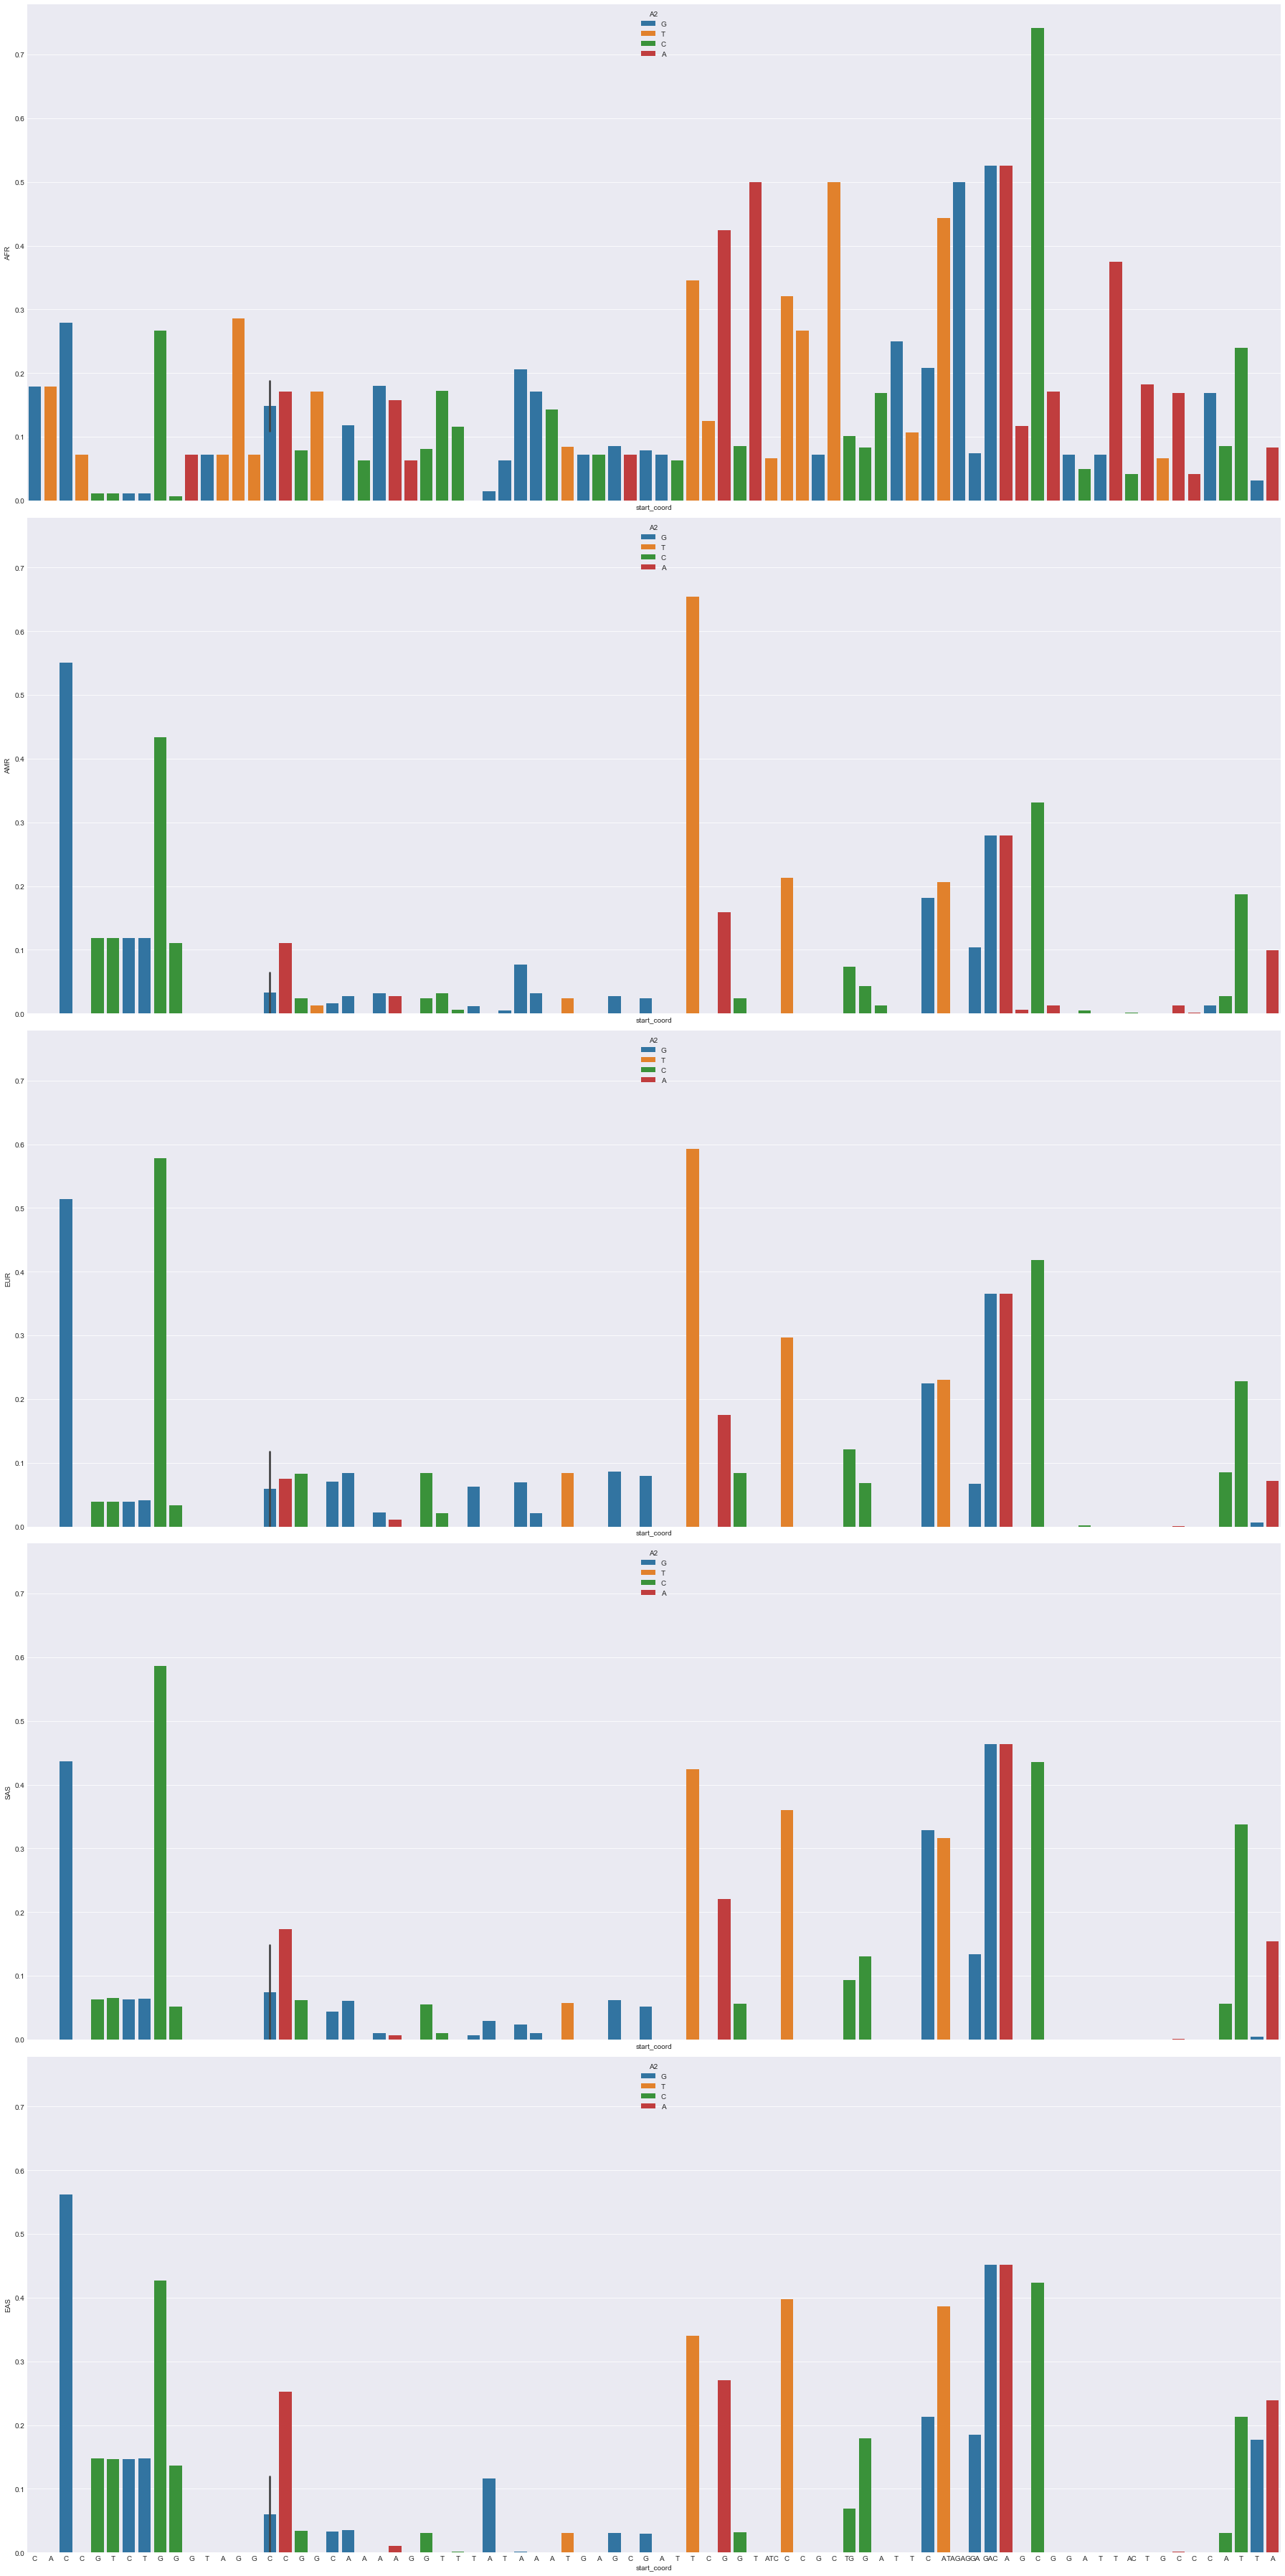

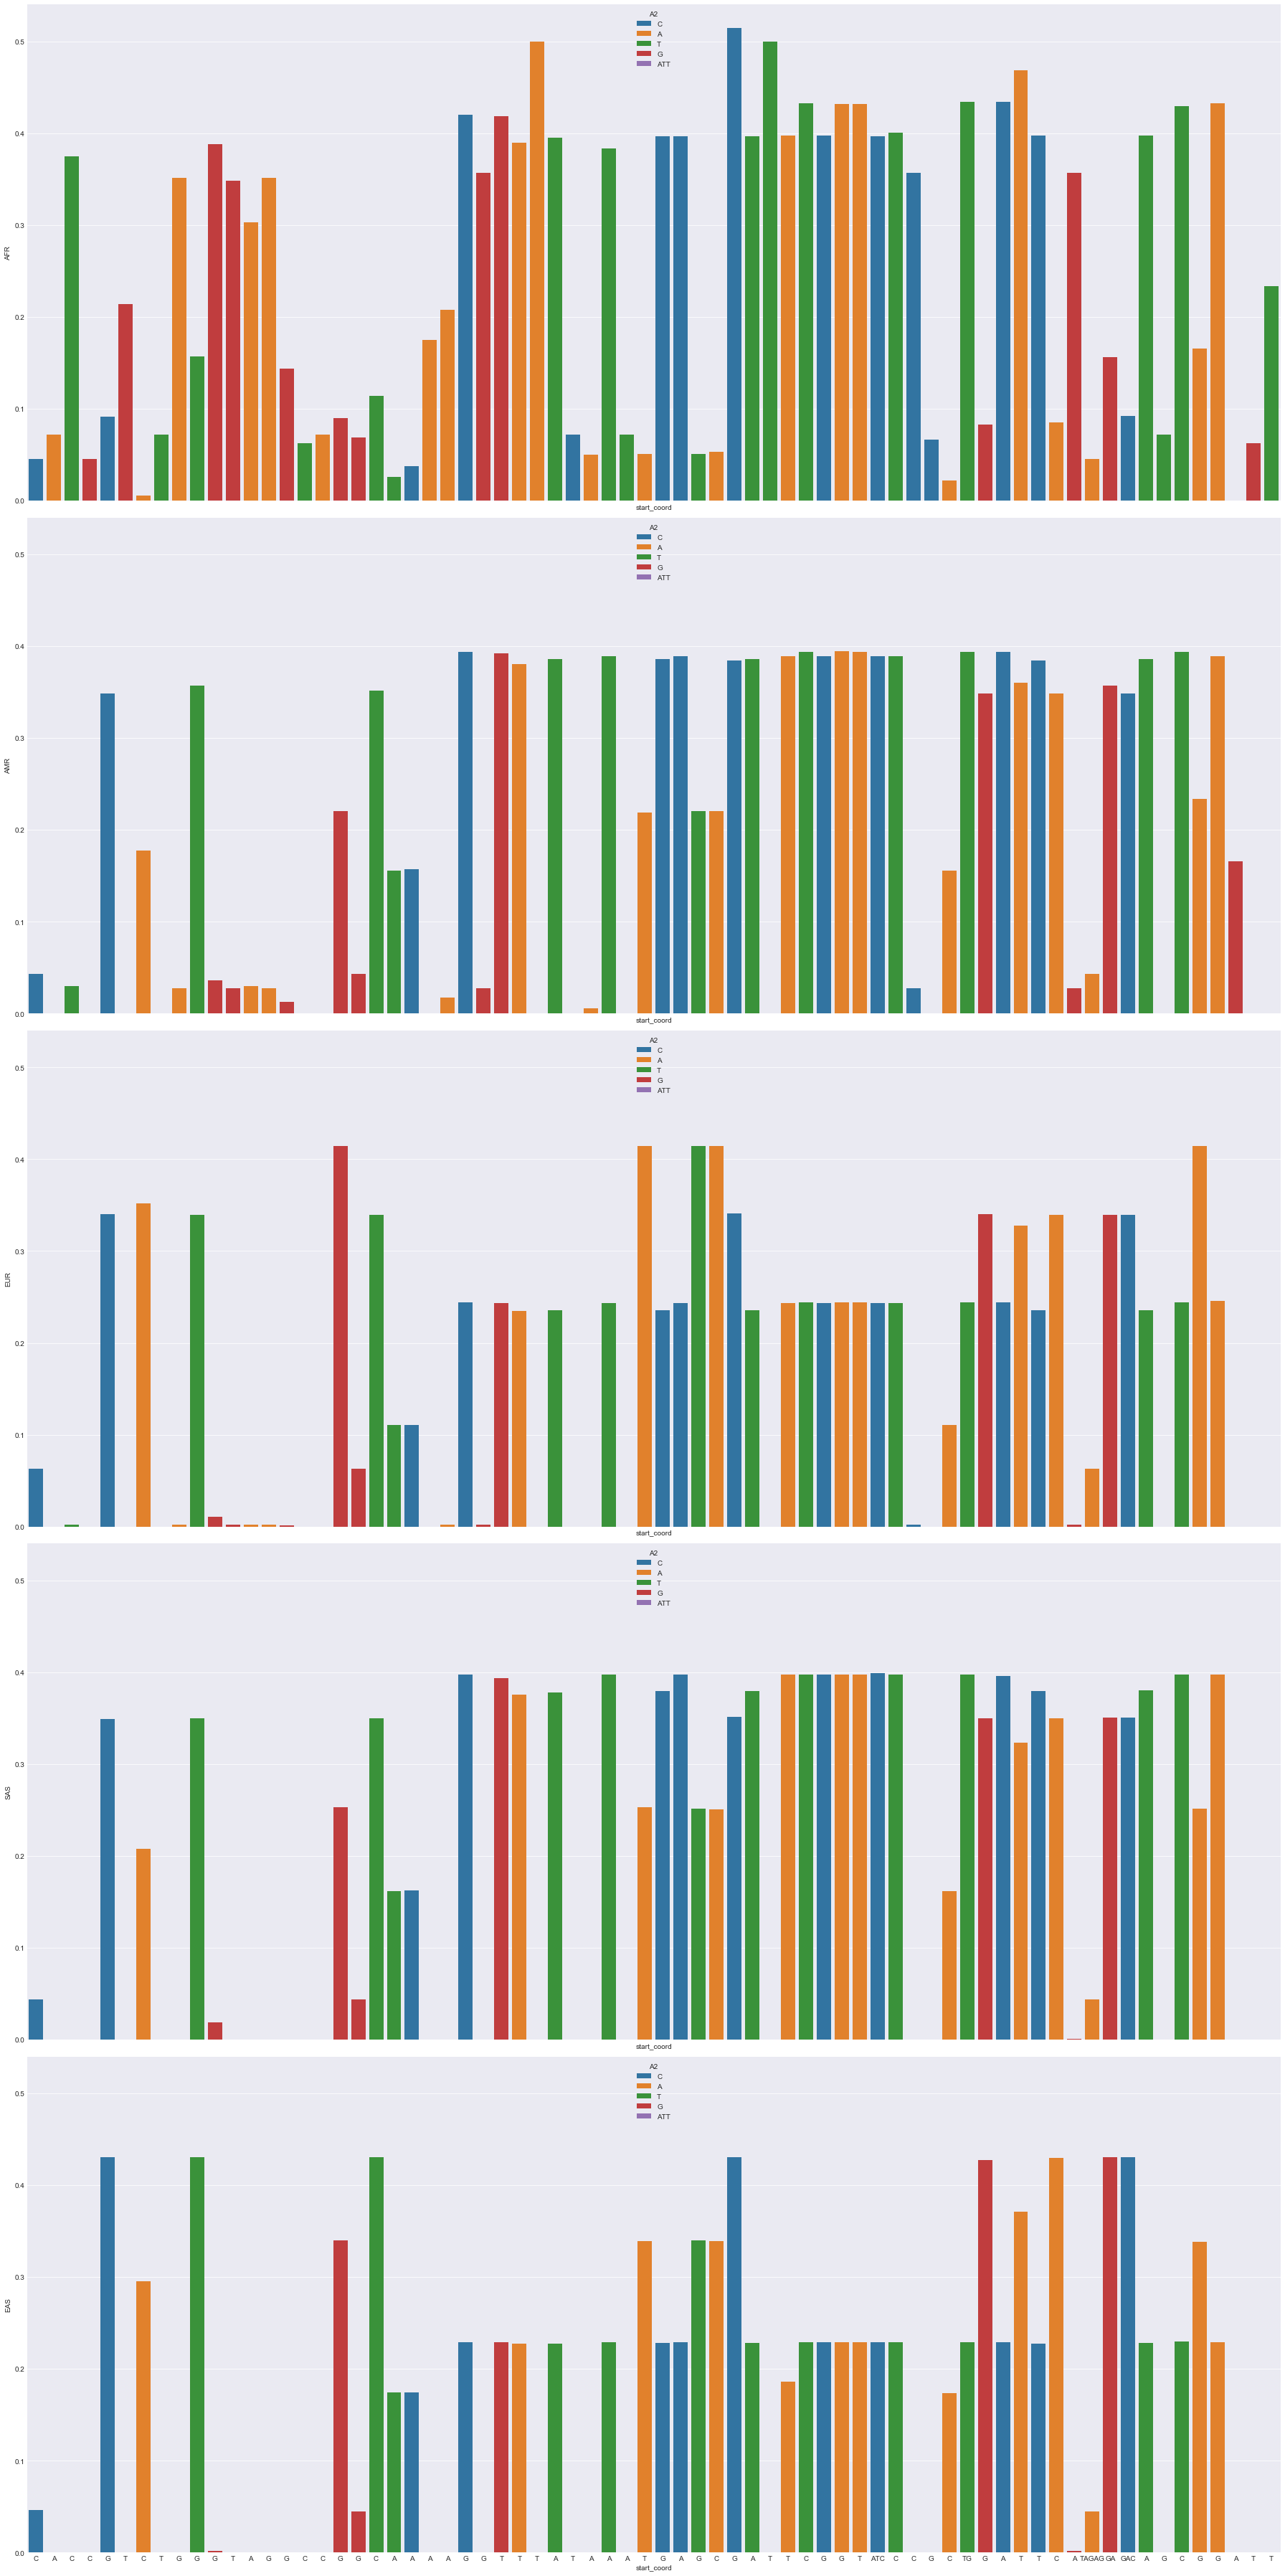

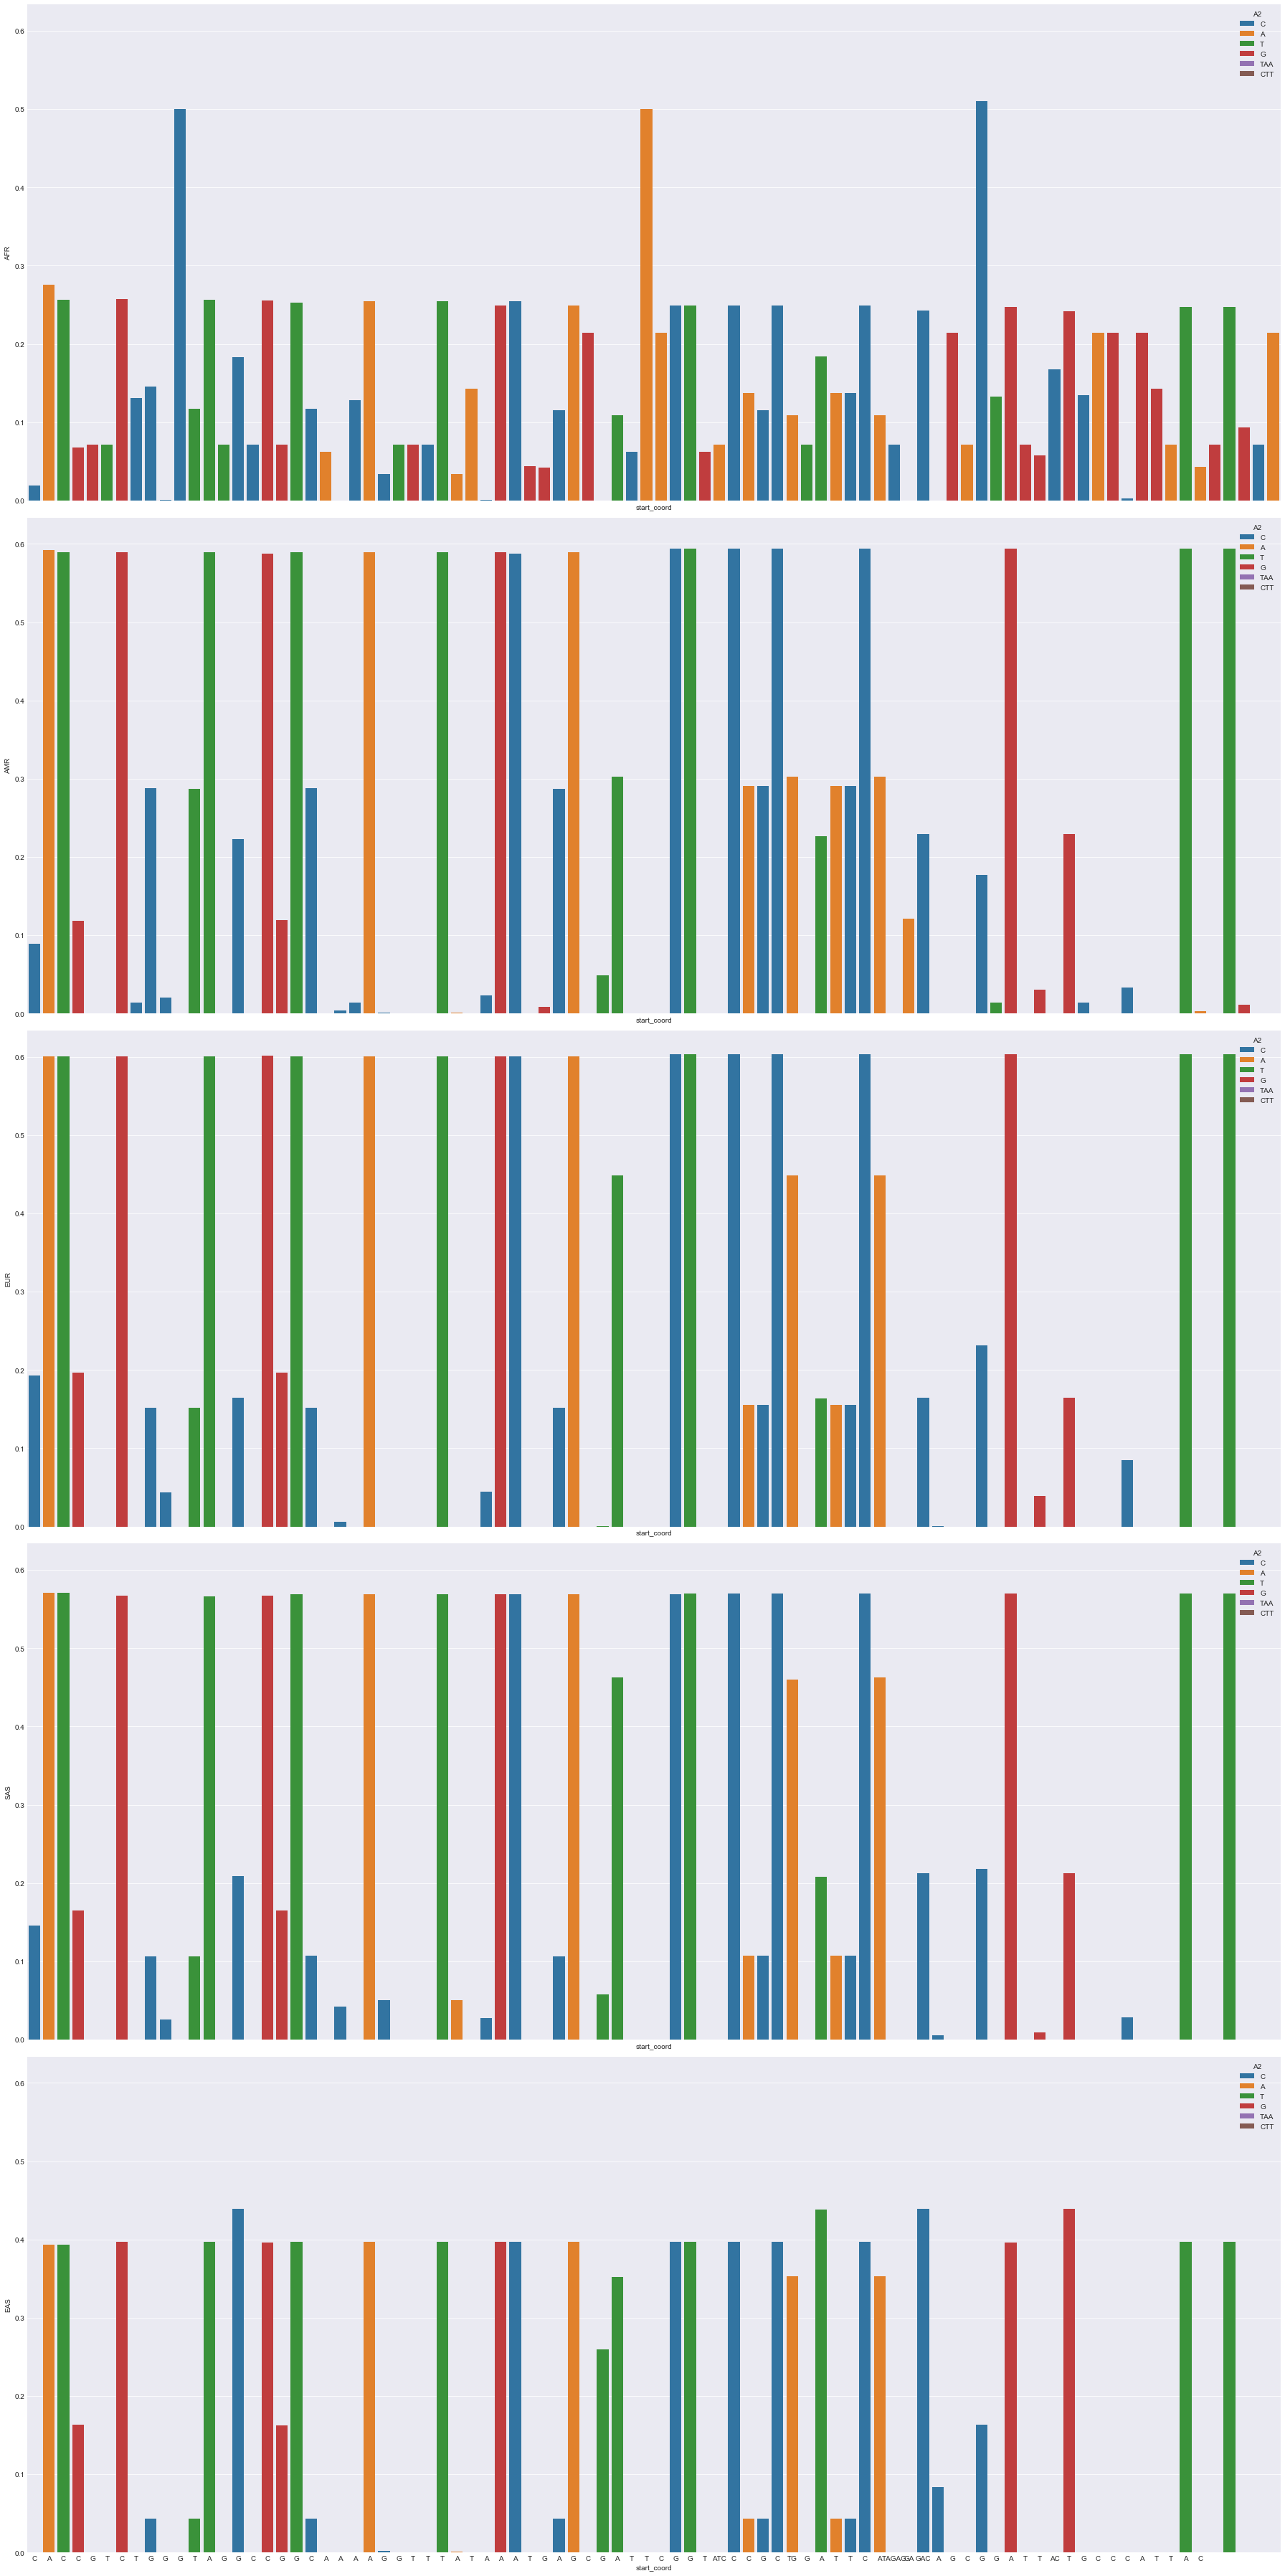

In [29]:
def graph(pops, dataset, name):
    fig, ax = plt.subplots(len(pops), figsize=(25,10*len(pops)), sharex=True, sharey=True)
    #print(plt.style.available)
    plt.style.use("seaborn-darkgrid")
    pops = pops

    for index, i in enumerate(ax):
        sns.barplot(x="start_coord", y=pops[index], data=dataset, hue="A2", dodge=False, ax=i).set(xticklabels=data["A1"])

    plt.tight_layout()
    plt.savefig('../Figures/{}.png'.format(name), dpi=300)

graph(["AFR", "AMR", "EUR", "SAS", "EAS"], data, "Population stratified Allele Frequency | CYP2A6")
graph(["AFR", "AMR", "EUR", "SAS", "EAS"], data2, "Population stratified Allele Frequency | CYP2B6")
graph(["AFR", "AMR", "EUR", "SAS", "EAS"], data3, "Population stratified Allele Frequency | UGT2B7")

In [30]:
data.head(20)

,Variant,Location,Allele,Existing_variation,Consequence,Feature,SOURCE,SIFT,PolyPhen,Condel,...,SAS,AFR_P_EUR,AFR_OR_EUR,AFR_P_EAS,AFR_OR_EAS,AFR_P_AMR,AFR_OR_AMR,AFR_P_SAS,AFR_OR_SAS,start_coord
5,rs113777046,19:40843612-40843612,C,rs113777046,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.00000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,40843612
6,rs112026263,19:40843614-40843614,A,rs112026263,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.00000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,40843614
8,rs8192733,19:40843645-40843645,C,rs8192733,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.43660,1.263098e-27,0.367042,3.499269e-39,0.301859,8.318859e-30,0.317022,1.413518e-13,0.500667,40843645
9,19_41349573,19:40843668-40843668,C,-,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.00000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,40843668
10,rs28399481,19:40843693-40843693,G,rs28399481,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.06339,4.579525e-05,0.273698,2.785167e-34,0.063686,3.101465e-22,0.082444,1.889285e-10,0.163139,40843693
12,rs28399480,19:40843698-40843698,T,rs28399480,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.06544,4.579525e-05,0.273698,5.603487e-34,0.064190,3.101465e-22,0.082444,6.010192e-11,0.157697,40843698
13,rs28399479,19:40843700-40843700,C,rs28399479,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.06339,4.579525e-05,0.273698,5.603487e-34,0.064190,3.101465e-22,0.082444,1.889285e-10,0.163139,40843700
14,rs28399478,19:40843707-40843707,T,rs28399478,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.06442,1.072872e-05,0.253358,2.785167e-34,0.063686,3.101465e-22,0.082444,1.066989e-10,0.160375,40843707
15,rs7248240,19:40843735-40843735,G,-,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.58690,5.496457e-47,0.265805,3.296375e-14,0.490237,9.362437e-13,0.476226,9.390285e-49,0.256816,40843735
16,rs560208518,19:40843748-40843748,G,rs560208518,3_prime_UTR_variant,NM_000762,RefSeq,-,-,-,...,0.05215,2.094990e-05,0.206338,1.143388e-34,0.044132,1.207428e-23,0.056111,5.532833e-10,0.127215,40843748


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


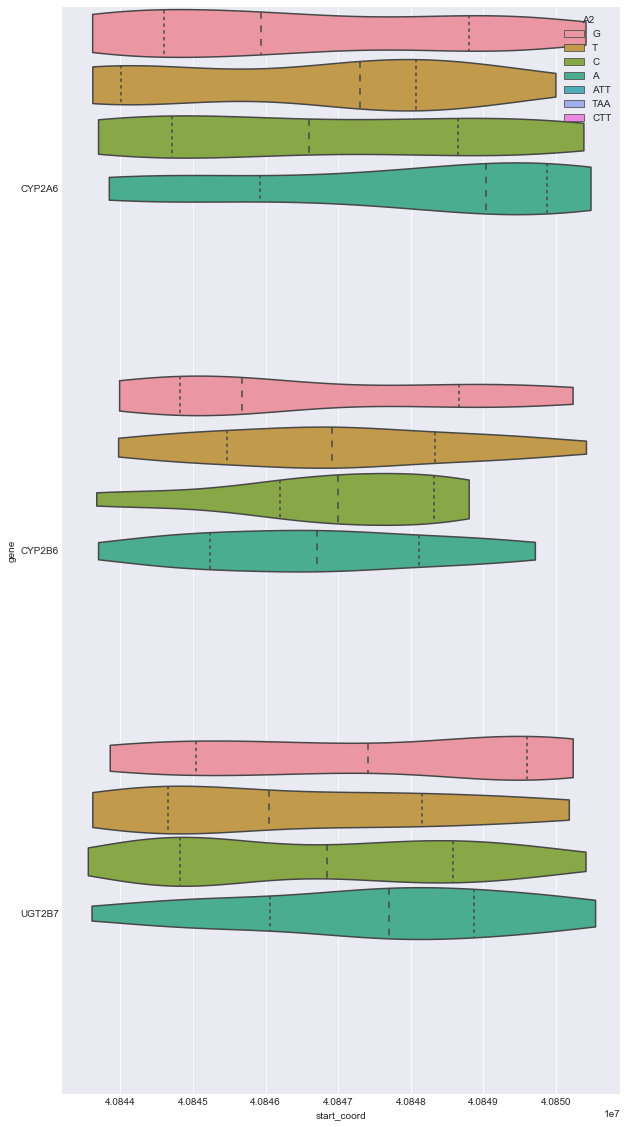

In [125]:
data.loc[:, "gene"] = "CYP2A6"
data2.loc[:, "gene"] = "CYP2B6"
data3.loc[:, "gene"] = "UGT2B7"
datasets = [data, data2, data3]

data0 = pd.concat(datasets)
data0.loc[:, "start_coord"] = pd.to_numeric(data0["start_coord"])


plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots(figsize=(10,20))
#print(plt.style.available)
sns.violinplot(x="start_coord", y="gene", hue="A2", data=data0, ax=ax, inner="quartile", cut=0, width=1)

plt.savefig('../Figures/Variant Distribution.png', dpi=300)


In [126]:
data0.loc[~(data0["SAS"] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 8 to 2317
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Variant             560 non-null    object 
 1   Location            560 non-null    object 
 2   Allele              560 non-null    object 
 3   Existing_variation  560 non-null    object 
 4   Consequence         560 non-null    object 
 5   Feature             560 non-null    object 
 6   SOURCE              560 non-null    object 
 7   SIFT                560 non-null    object 
 8   PolyPhen            560 non-null    object 
 9   Condel              560 non-null    object 
 10  CADD_PHRED          560 non-null    object 
 11  PHENOTYPES          560 non-null    object 
 12  A1                  560 non-null    object 
 13  A2                  560 non-null    object 
 14  AFR                 560 non-null    float64
 15  AMR                 560 non-null    float64
 16  EAS    

In [22]:
frqData = pd.read_excel("../data/ALL_1_SUPER_frq.xlsx")